In [1]:
import numpy as np

In [2]:
def parabola(x, a, b, c):
    return a*x**2 + b*x + c

def gamma(beta):
    return 1/(np.sqrt(1-beta**2))

def beta(gamma):
    return np.sqrt(1-(1/gamma**2))

def gammaE(energy):
    return energy/(0.511*1E6)

def calc_emit(a, b, c, d, el, prefac = 1):
    s11 = a/((d*el)**2)
    s12 = (b-2*d*el*s11)/(2*el*d**2)
    s22 = (c - s11 - 2*d*s12)/d**2
    geometric_emittance = np.sqrt(s11*s22-((s12)**2))
    return geometric_emittance*prefac

def calcEmit(A, B, C, prefac = 1):
    sig_11 = A/(s12)**2
    sig_12 = (-A/(s12)**2)*(B + (s11/s12))
    sig_22 = (1/s12**2)*(A*B*B + C) + 2*A*B*(s11/s12) + A*(s11/s12)**2
    ge = np.sqrt(A*C)/(sig_12)**2
    ne = prefac*ge
    return ne
beam_energy = 750 * 1E3
beta = beta(gammaE(beam_energy))
prefac = beta*gamma(beta)



### This is the distance from the solenoid to the YAG
L = (1.490314 - 0.24653) #(1.490314-0.246530) ### THIS IS IN METERSSSS ### sept 18, Nicole will send info

### This is the effective length/width of the solenoid
el = 0.1342 

## This is used in the second emit Calc method
M_drift = np.identity(2)
M_drift[0, 1] = L

s11 = M_drift[0,0]
s12 = M_drift[0,1]
s21 = M_drift[1,0]
s22 = M_drift[1,1]

In [3]:
import matplotlib.pyplot as plt
import os
import sys
import glob
sys.path.append('/global/u1/l/lgupta/cori/GitHub/lcls-tools/')
sys.path.append('/global/u1/l/lgupta/cori/GitHub/lcls-tools/lcls_tools/devices/profile_monitor')
sys.path.append('/global/u1/l/lgupta/cori/GitHub/lcls-tools/lcls_tools/devices/magnet')
sys.path.append('/global/u1/l/lgupta/cori/GitHub/lcls-tools/lcls_tools/image_processing')
sys.path.append('/global/u1/l/lgupta/cori/GitHub/lcls-tools/lcls_tools/cor_plot')

from lcls_tools import image_processing as imp
from cor_plot_mat_scan import CorPlotMatScan as C
import scipy.optimize

PATH = "/global/u1/l/lgupta/m669/MeasuredData/Emittance/"
FILES = glob.glob(PATH+"Corr*")
FILES.sort()
print(len(FILES))


40


2


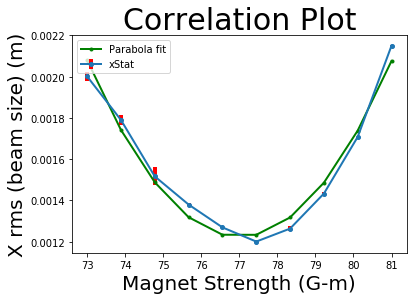

In [4]:
data = C(FILES[18])

# set the number of samples
s = data.samples
print(s)


# can use to see the number of data points
#print(data.beam.keys())

# set the x values for plot
x = data.ctrl_vals
#el = 0.1342
x = np.array(x)*1e3
# format: data.beam[iteration][sample][fit][beam_name]
# iteration: length of x
# sample: number of samples
# fit: index 0-6 (see types of fit below)
# beam_name": string chosen from types of beam_names below
# types of fit: ['Gaussian', 'Asymmetric', 'Super', 'RMS', 'RMS cut peak', 'RMS cut area', 'RMS floor']
# types of beam_name: profx, xStat, profy, yStat, profu, uStat, stats

yarray = []
yerr = []

for i in range(0, len(x)):

    yvals = []

    for j in range(0, s):
        # store data in array
        yvals.append(((data.beam[i][j][0]['xStat'])[0])[2])

    # calculate average of data and store in array
    meany = np.mean(yvals)
    yarray.append(meany)

    # calculate error of data and store in array
    stdy = np.std(yvals)
    yerr.append(stdy)

yerr = np.array(yerr)*1E-6
yarray = np.array(yarray)*1E-6
fit_params, pcov = scipy.optimize.curve_fit(parabola, x, yarray)
y_fit = parabola(np.array(x), *fit_params)
fit_err = np.sqrt(np.diag(pcov))


# Correlation plot

plt.xlabel('Magnet Strength (G-m)', fontsize=20)
plt.ylabel('X rms (beam size) (m)', fontsize=20)
plt.errorbar(x, yarray, yerr=yerr, label='xStat', ecolor='red', elinewidth=4, linewidth=2, marker='o', markersize=4)
plt.plot(x, y_fit, '.-g', linewidth = 2, label = 'Parabola fit')
plt.title('Correlation Plot', fontsize=30)
plt.legend(loc='upper left')

plt.show()

In [6]:
a, b, c = fit_params

print("Version from Minty, Zimmermann")
print("geometric emittance:  " + str(calcEmit(a, b, c, prefac = 1)))
print("normalized emittance:  " + str(calcEmit(a, b, c, prefac = prefac)))

print("Version from CERN slides")
print("geometric emittance:  " + str(calc_emit(a, b, c, L, el, prefac = 1)))
print("normalized emittance:  " + str(calc_emit(a, b, c, L, el, prefac = prefac)))

5.340965911862145e-05 -0.008225508670226953 0.31792160104594464
Version from Minty, Zimmermann
geometric emittance:  5459240.096774485
normalized emittance:  5864996.922606101
Version from CERN slides
geometric emittance:  0.0012312158956627143
normalized emittance:  0.0013227257477450031
